In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Load data
patients = pd.read_csv('/Users/deeptilalwani/Documents/python development/LongDRScreening_small_20150209/Patients.csv')
intra_visit_data = pd.read_csv('/Users/deeptilalwani/Documents/python development/LongDRScreening_small_20150209/IntraVisit.csv')
inter_visit_data = pd.read_csv('/Users/deeptilalwani/Documents/python development/LongDRScreening_small_20150209/InterVisit.csv')

In [3]:
# Merge intra and inter visit data with patient information
intra_merged = pd.merge(intra_visit_data, patients, left_on='Eye_ID', right_on='Eye_ID_OD', how='inner')
inter_merged = pd.merge(inter_visit_data, patients, left_on='Eye_ID', right_on='Eye_ID_OD', how='inner')


In [4]:
# Combine both intra and inter visit data
merged_data = pd.concat([intra_merged, inter_merged])

In [5]:
merged_data

,Eye_ID,Visit,Method,Grader,Order,Score,Patient_ID,Sex,Age,Eye_ID_OS,Eye_ID_OD
0,eye_001,2.0,1,1,135,3,P1,M,60,eye_002,eye_001
1,eye_001,2.0,2,1,124,3,P1,M,60,eye_002,eye_001
2,eye_003,2.0,1,1,68,3,P2,F,50,eye_004,eye_003
3,eye_003,2.0,2,1,17,3,P2,F,50,eye_004,eye_003
4,eye_005,1.0,1,1,105,2,P3,F,37,eye_006,eye_005
...,...,...,...,...,...,...,...,...,...,...,...
205,eye_135,NaN,2,2,107,4,P68,F,59,eye_136,eye_135
206,eye_137,NaN,1,2,11,2,P69,M,90,eye_138,eye_137
207,eye_137,NaN,2,2,1,2,P69,M,90,eye_138,eye_137
208,eye_139,NaN,1,2,68,4,P70,F,68,eye_140,eye_139


In [6]:
# 'Score' is the target variable indicating disease progression
target = 'Score'
# Exclude 'Eye_ID_OS' and 'Eye_ID_OD' columns from features
features = merged_data.columns.difference([target, 'Eye_ID', 'Eye_ID_OS', 'Eye_ID_OD', 'Visit', 'Method', 'Grader', 'Order'])

In [7]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numeric using LabelEncoder
label_encoder = LabelEncoder()
merged_data['Eye_ID'] = label_encoder.fit_transform(merged_data['Eye_ID'])
merged_data['Sex'] = label_encoder.fit_transform(merged_data['Sex'])

# One-hot encode 'Patient_ID'
merged_data = pd.get_dummies(merged_data, columns=['Patient_ID'], prefix='Patient')


# Fill missing values in the 'Visit' column with a default value (e.g., 0)
merged_data['Visit'] = merged_data['Visit'].fillna(0)


In [8]:
merged_data

,Eye_ID,Visit,Method,Grader,Order,Score,Sex,Age,Eye_ID_OS,Eye_ID_OD,...,Patient_P64,Patient_P65,Patient_P66,Patient_P67,Patient_P68,Patient_P69,Patient_P7,Patient_P70,Patient_P8,Patient_P9
0,0,2.0,1,1,135,3,1,60,eye_002,eye_001,...,0,0,0,0,0,0,0,0,0,0
1,0,2.0,2,1,124,3,1,60,eye_002,eye_001,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1,1,68,3,0,50,eye_004,eye_003,...,0,0,0,0,0,0,0,0,0,0
3,1,2.0,2,1,17,3,0,50,eye_004,eye_003,...,0,0,0,0,0,0,0,0,0,0
4,2,1.0,1,1,105,2,0,37,eye_006,eye_005,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,67,0.0,2,2,107,4,0,59,eye_136,eye_135,...,0,0,0,0,1,0,0,0,0,0
206,68,0.0,1,2,11,2,1,90,eye_138,eye_137,...,0,0,0,0,0,1,0,0,0,0
207,68,0.0,2,2,1,2,1,90,eye_138,eye_137,...,0,0,0,0,0,1,0,0,0,0
208,69,0.0,1,2,68,4,0,68,eye_140,eye_139,...,0,0,0,0,0,0,0,1,0,0


In [9]:
# Split data into train and test sets
train_data, test_data = train_test_split(merged_data, test_size=0.2, random_state=42)

In [10]:
# Define the correct 'features' variable
features = train_data.columns.difference([target, 'Eye_ID', 'Eye_ID_OS', 'Eye_ID_OD', 'Visit', 'Method', 'Grader', 'Order'])

In [11]:
# Train a simple RandomForestClassifier as an example
model = RandomForestClassifier(random_state=42)
model.fit(train_data[features], train_data[target])

RandomForestClassifier(random_state=42)

In [12]:
# Make predictions on the test set
predictions = model.predict(test_data[features])

In [13]:
# Evaluate the model
accuracy = accuracy_score(test_data[target], predictions)
report = classification_report(test_data[target], predictions)

In [14]:
# Print the results
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

Accuracy: 0.42857142857142855
Classification Report:
               precision    recall  f1-score   support

           1       0.80      0.44      0.57         9
           2       0.62      0.25      0.36        20
           3       0.49      0.53      0.51        34
           4       0.26      0.43      0.33        21

    accuracy                           0.43        84
   macro avg       0.54      0.41      0.44        84
weighted avg       0.50      0.43      0.43        84



### The RandomForestClassifier doesn't inherently consider the temporal aspects of our data, and it treats each observation as independent.

## For tasks involving time-series data and disease progression prediction, models like ARIMA, LSTM, or other time-series models are more suitable.

# ARIMA for time-series modeling:

In [15]:
from statsmodels.tsa.arima.model import ARIMA

In [16]:
merged_data

,Eye_ID,Visit,Method,Grader,Order,Score,Sex,Age,Eye_ID_OS,Eye_ID_OD,...,Patient_P64,Patient_P65,Patient_P66,Patient_P67,Patient_P68,Patient_P69,Patient_P7,Patient_P70,Patient_P8,Patient_P9
0,0,2.0,1,1,135,3,1,60,eye_002,eye_001,...,0,0,0,0,0,0,0,0,0,0
1,0,2.0,2,1,124,3,1,60,eye_002,eye_001,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1,1,68,3,0,50,eye_004,eye_003,...,0,0,0,0,0,0,0,0,0,0
3,1,2.0,2,1,17,3,0,50,eye_004,eye_003,...,0,0,0,0,0,0,0,0,0,0
4,2,1.0,1,1,105,2,0,37,eye_006,eye_005,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,67,0.0,2,2,107,4,0,59,eye_136,eye_135,...,0,0,0,0,1,0,0,0,0,0
206,68,0.0,1,2,11,2,1,90,eye_138,eye_137,...,0,0,0,0,0,1,0,0,0,0
207,68,0.0,2,2,1,2,1,90,eye_138,eye_137,...,0,0,0,0,0,1,0,0,0,0
208,69,0.0,1,2,68,4,0,68,eye_140,eye_139,...,0,0,0,0,0,0,0,1,0,0


In [17]:
# 'merged_data' is our time-series data
# Using'Score' as the target variable for disease progression

In [18]:
# Extract the relevant columns for the time series
time_series_data = merged_data[['Score', 'Visit', 'Method', 'Grader', 'Order', 'Sex', 'Age']]

In [19]:
target = 'Score'

In [20]:
# Split the data into training and testing sets
train_size = int(len(time_series_data) * 0.8)
train, test = time_series_data[:train_size], time_series_data[train_size:]

#### Use information criteria such as AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion) to compare different models. Lower values of AIC or BIC generally indicate better models.

In [21]:
import itertools
import statsmodels.api as sm

# Define the p, d, q values to search
p = d = q = range(0, 6)
pdq = list(itertools.product(p, d, q))

# Perform grid search
best_aic = float("inf")
best_order = None
for order in pdq:
    try:
        model = sm.tsa.ARIMA(train[target], order=order)
        results = model.fit()
        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_order = order
    except:
        continue

print(f"Best AIC: {best_aic}")
print(f"Best Order: {best_order}")

/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/st

Best AIC: 696.8082584872334
Best Order: (5, 0, 3)


/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [22]:
score_series = merged_data['Score']


In [23]:
# Fit ARIMA model
best_order = (5, 0, 3)
model = ARIMA(score_series, order=best_order)
result = model.fit()

/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [24]:
# Summary of the model
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Score   No. Observations:                  420
Model:                 ARIMA(5, 0, 3)   Log Likelihood                -468.312
Date:                Wed, 20 Dec 2023   AIC                            956.624
Time:                        16:02:03   BIC                            997.027
Sample:                             0   HQIC                           972.593
                                - 420                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0253      0.079     38.197      0.000       2.870       3.180
ar.L1         -0.7484      0.094     -7.986      0.000      -0.932      -0.565
ar.L2         -0.5832      0.057    -10.224      0.0

### Coefficients:

##### Const (Constant): The intercept term in the model is 3.0253.
##### ar.L1 to ar.L5 (AutoRegressive terms): These coefficients represent the weight assigned to the respective lagged values of the 'Score' variable. They indicate the linear relationship between the current observation and its past values.
##### ma.L1 to ma.L3 (Moving Average terms): These coefficients represent the weight assigned to the past forecast errors. They capture the influence of past errors on the current observation.

### Standard Error (std err):

##### Indicates the standard deviation of the coefficient estimate. Smaller values suggest more precise estimates.
##### z, P>|z| (Z-statistic and p-value):

##### The z-statistic measures the number of standard deviations a data point is from the mean. The p-value tests the null hypothesis that the coefficient is equal to zero. Low p-values (< 0.05) indicate that the coefficient is statistically significant.



## Interpretation:

##### The coefficients, their significance, and the diagnostic tests collectively provide information about the quality of the model fit.
##### The model seems to capture significant autoregressive and moving average patterns in the 'Score' variable.
##### The residuals' diagnostic tests indicate that the model may be a good fit

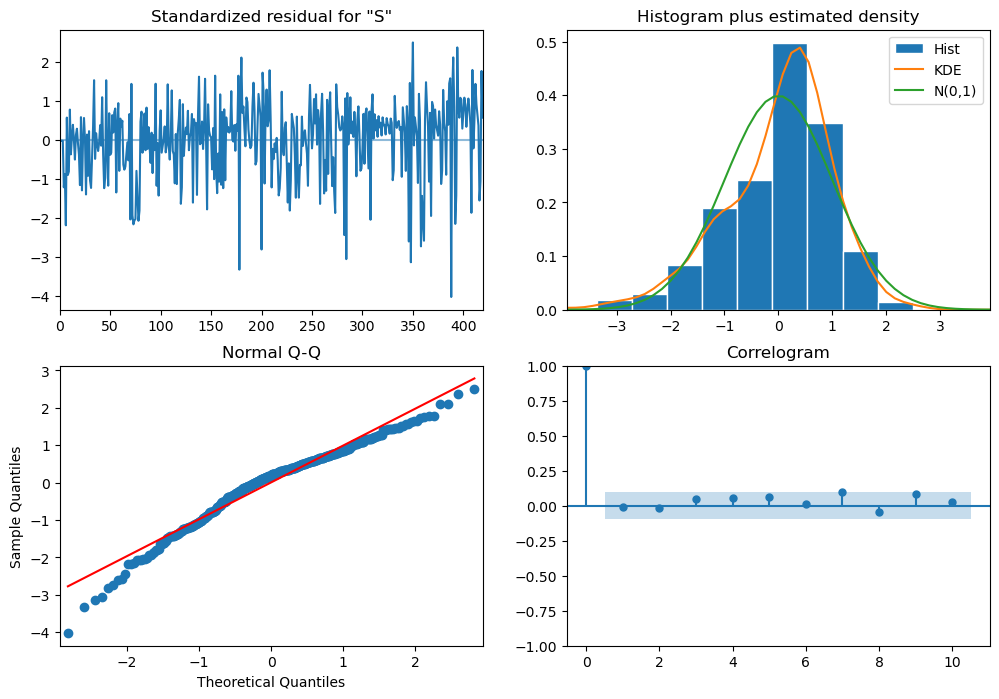

In [25]:
# Plot residuals
import matplotlib.pyplot as plt
result.plot_diagnostics(figsize=(12, 8))
plt.show()


# Model validation

In [36]:
# Make predictions
predictions = result.predict(start=0, end=len(score_series) - 1 + 10)  # Adjust the end parameter



/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


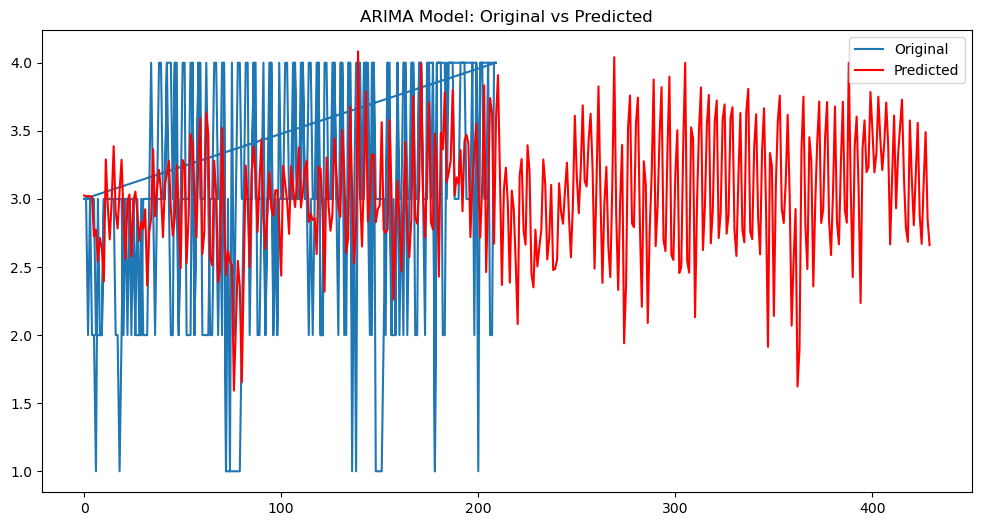

In [37]:
# Plot original vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(score_series, label='Original')
plt.plot(predictions, label='Predicted', color='red')
plt.legend()
plt.title('ARIMA Model: Original vs Predicted')
plt.show()

In [46]:
# Calculate residuals
residuals = score_series - predictions[:-10]  # Exclude the last 10 predictions
residuals

0     -0.025257
0     -0.025257
1     -0.019455
1     -0.019455
2     -0.021583
         ...   
415         NaN
416         NaN
417         NaN
418         NaN
419         NaN
Length: 630, dtype: float64

In [47]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(score_series, predictions[:-10]))  # Exclude the last 10 predictions
print(f'ARIMA Model RMSE: {rmse}')

ARIMA Model RMSE: 0.7365209460546143


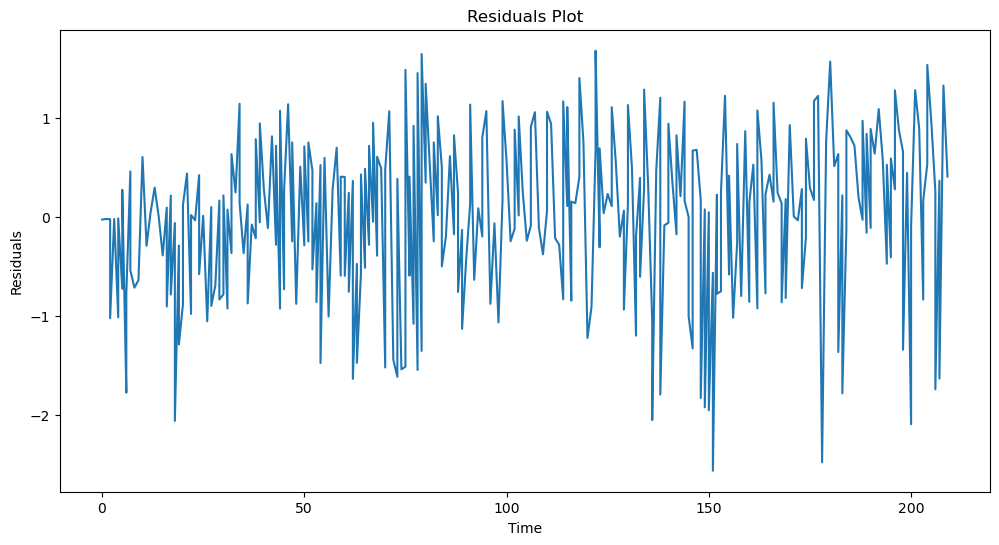

In [48]:
# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals Plot')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()


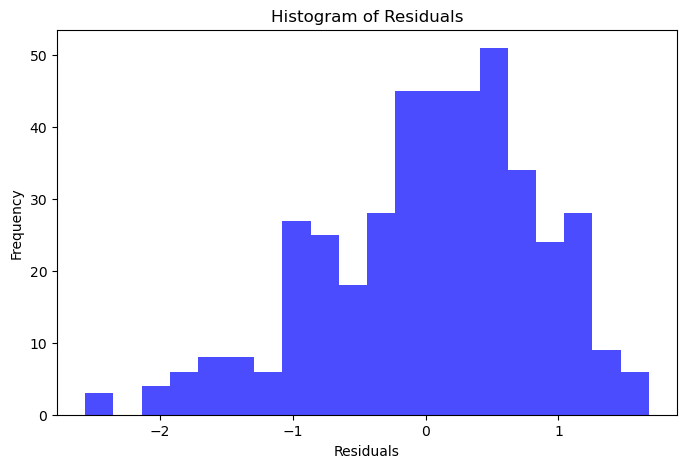

In [49]:
# Plot histogram of residuals
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


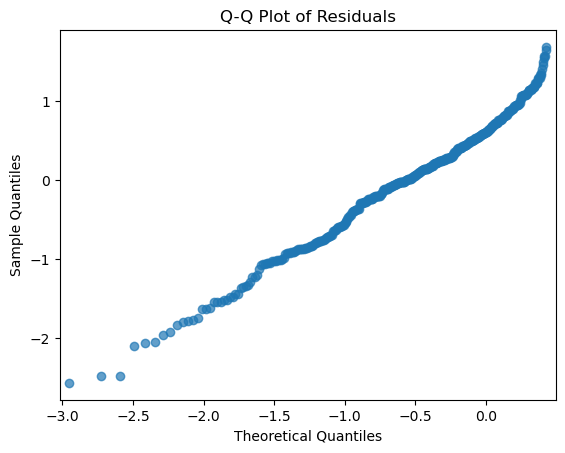

In [50]:
import statsmodels.api as sm

# Create Q-Q plot
sm.qqplot(residuals, line='s', color='blue', alpha=0.7)
plt.title('Q-Q Plot of Residuals')
plt.show()

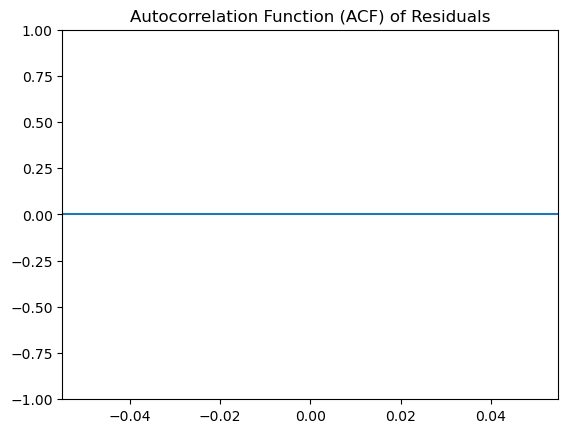

In [52]:
# Plot ACF of residuals
plot_acf(residuals, lags=30)
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.show()

### A straight horizontal blue line in the ACF plot indicates that there is no significant autocorrelation between the residuals at different lags. In other words, the residuals do not exhibit any clear pattern of correlation or dependence over time.




# XGBoost for time series forecasting

In [53]:
!pip install xgboost


In [54]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [55]:
#since 'score_series' is our target variable
train_data, test_data = train_test_split(score_series, test_size=0.2, shuffle=False)


In [56]:
# Prepare the data
X_train, y_train = train_data.index.values.reshape(-1, 1), train_data.values
X_test, y_test = test_data.index.values.reshape(-1, 1), test_data.values

In [57]:
# Train XGBoost model
model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [58]:
# Make predictions
predictions = model.predict(X_test)


In [62]:
# Evaluate the model
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'Root Mean Squared Error (RMSE)_xg boost: {rmse}')

Root Mean Squared Error (RMSE)_xg boost: 1.0085911916483545


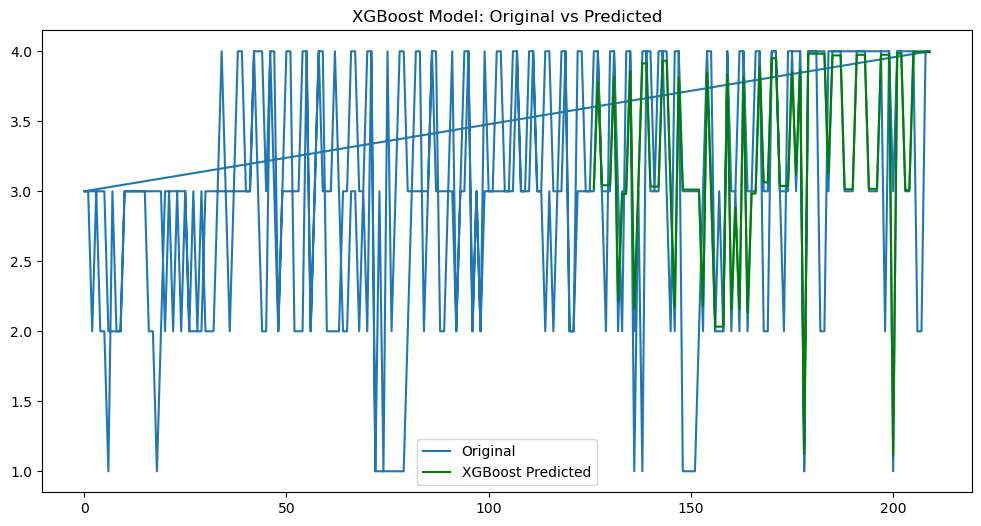

In [63]:
# Plot original vs XGBoost predicted values
plt.figure(figsize=(12, 6))
plt.plot(score_series.index, score_series, label='Original')
plt.plot(test_data.index, predictions, label='XGBoost Predicted', color='green')
plt.legend()
plt.title('XGBoost Model: Original vs Predicted')
plt.show()


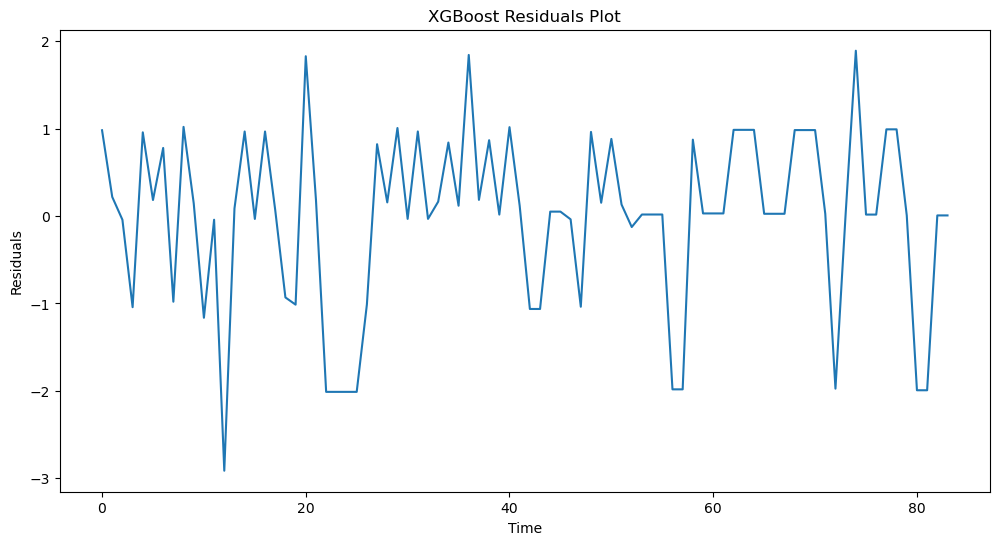

In [65]:
# Calculate residuals
residuals = y_test - predictions

# Plot residuals for XGBoost
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('XGBoost Residuals Plot')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

### Comparing ARIMA and XG BOOST 

#### ARIMA Model RMSE: 0.7365
#### XGBoost Model RMSE: 1.0086
##### A lower RMSE indicates better predictive performance. In this case, the ARIMA model has a lower RMSE, suggesting that it performs better in terms of predicting the target variable ( 'Score') compared to the XGBoost model. The ARIMA model has a smaller root mean squared error, indicating that its predictions are closer to the actual values on average.